In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pickle
import os
import random

In [2]:
# Function to load a single batch of CIFAR-10
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        data = dict[b'data']
        labels = dict[b'labels']
        data = data.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        labels = np.array(labels)
    return data, labels

# Function to load all CIFAR-10 data
def load_cifar10(path):
    train_data = []
    train_labels = []
    for i in range(1, 6):
        data, labels = load_cifar10_batch(os.path.join(path, f'data_batch_{i}'))
        train_data.append(data)
        train_labels.append(labels)
    train_data = np.concatenate(train_data)
    train_labels = np.concatenate(train_labels)
    test_data, test_labels = load_cifar10_batch(os.path.join(path, 'test_batch'))
    return (train_data, train_labels), (test_data, test_labels)




In [4]:
# Specify the path to your CIFAR-10 data files
cifar10_path = 'D:\\Hemant\\Data Science\\Projects\\ML\\cifar-10-batches-py'

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = load_cifar10(cifar10_path)


In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print the shape of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [6]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



C:\Users\Windows\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3208 - loss: 1.8288 - val_accuracy: 0.5354 - val_loss: 1.2995
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5494 - loss: 1.2606 - val_accuracy: 0.5750 - val_loss: 1.1925
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6193 - loss: 1.0751 - val_accuracy: 0.6347 - val_loss: 1.0329
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6670 - loss: 0.9470 - val_accuracy: 0.6451 - val_loss: 1.0121
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6896 - loss: 0.8833 - val_accuracy: 0.6768 - val_loss: 0.9287
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7081 - loss: 0.8306 - val_accuracy: 0.6826 - val_loss: 0.9204
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7268 - loss: 0.7816 - val_accuracy: 0.6951 - val_loss: 0.8880
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7464 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')



313/313 - 1s - 4ms/step - accuracy: 0.6981 - loss: 0.8963
Test accuracy: 0.6980999708175659


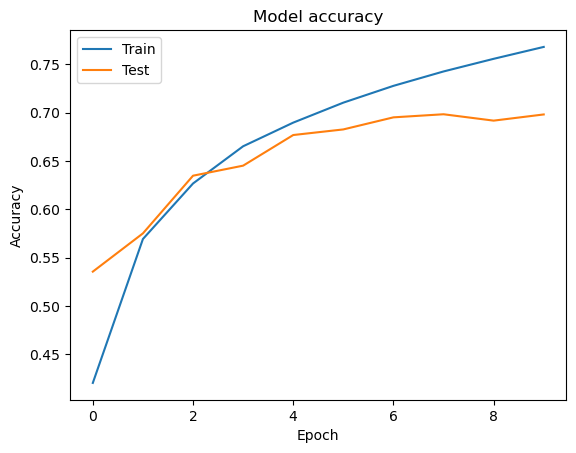

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



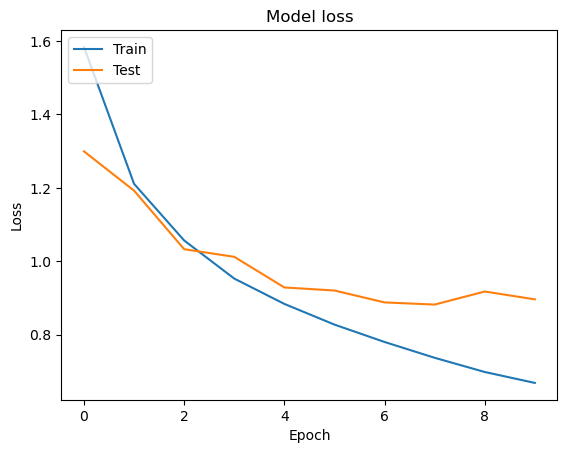

In [12]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


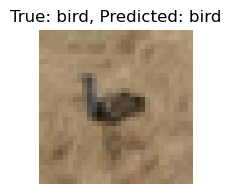

In [12]:
# Ensure test_labels is in the correct shape
test_labels = np.array(test_labels).flatten()

# Make predictions on the test images
predictions = model.predict(test_images)

# Convert logits to probabilities
probabilities = tf.nn.softmax(predictions, axis=1)

# Get the class with the highest probability
predicted_labels = np.argmax(probabilities, axis=1)

# Function to display a random image along with its predicted and true labels
def display_random_image(test_images, test_labels, predicted_labels, class_names):
    # Select a random index
    index = random.randint(0, len(test_images) - 1)
    
    # Get the true label and predicted label
    true_label = test_labels[index]
    predicted_label = predicted_labels[index]
    
    # Get the image
    image = test_images[index]
    
    # Display the image with the true and predicted labels
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

# Call the function to display a random image
display_random_image(test_images, test_labels, predicted_labels, class_names)